In [1]:
!pip install xgboost

In [2]:
pip install workalendar

In [3]:
!pip install pycaret

  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.8.1 requires scikit-learn>=0.24.0, but you have scikit-learn 0.23.2 which is incompatible.
sktime 0.8.1 requires statsmodels<=0.12.1, but you have statsmodels 0.13.0 which is incompatible.


In [4]:
pip install sktime

  Using cached statsmodels-0.12.1-cp37-cp37m-manylinux1_x86_64.whl (9.5 MB)
  Using cached scikit_learn-1.0.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.8.1 requires statsmodels<=0.12.1, but you have statsmodels 0.13.0 which is incompatible.
pycaret 2.3.4 requires scikit-learn==0.23.2, but you have scikit-learn 1.0.1 which is incompatible.


In [5]:
pip install shap

In [6]:
!pip install bayesian-optimization

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from tqdm import tqdm
import warnings
import scipy 
import lightgbm as lgb
import xgboost as xgb
import sktime
import sklearn as skl
from pycaret.regression import *
warnings.filterwarnings(action='ignore')
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
FOLDERNAME = '가스수요량'
assert FOLDERNAME is not None, "[!] Enter the foldername."
import plotly.express as px
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
%matplotlib inline 
%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/가스수요량


In [8]:
industrial_react = pd.read_csv('한국가스공사_서울 산업용 도시가스 수요의 기온반응함수_20171231.csv',  header=0, encoding='cp949')
jeju_elec_need = pd.read_csv('한국전력거래소_시간별 제주 전력수요량_08_31_2021.csv',  header=0, encoding='cp949')
total = pd.read_csv('한국가스공사_시간별 공급량_20181231.csv',  header=0, encoding='cp949')
temper = pd.read_csv('서울기온.csv', error_bad_lines=False)
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
rain = pd.read_csv('강수량.csv', error_bad_lines=False)
wind = pd.read_csv('풍속.csv', error_bad_lines=False)

In [9]:
jeju_elec_need

,거래일자,1시,2시,3시,4시,5시,6시,7시,8시,9시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2007-01-01,422.037,398.037,380.637,368.775,370.051,372.159,374.676,361.026,341.567,330.747,333.166,334.577,335.638,339.005,336.214,343.124,350.981,375.544,394.203,394.240,388.124,387.212,413.658,422.529
1,2007-01-02,397.819,374.159,358.701,348.422,348.996,362.357,369.187,372.940,382.285,385.006,392.786,394.396,385.328,390.446,382.423,382.390,386.971,413.192,439.721,432.768,425.605,416.936,435.161,438.139
2,2007-01-03,410.473,385.102,368.481,358.802,360.899,369.266,378.414,382.822,387.433,390.474,395.199,390.540,380.117,390.228,394.064,395.911,404.583,426.010,438.461,432.950,421.157,407.550,430.667,434.811
3,2007-01-04,406.087,380.251,364.197,355.552,358.710,366.111,374.988,379.917,382.947,388.768,396.891,394.193,382.108,387.533,386.480,385.895,387.390,413.372,433.645,428.572,417.667,410.505,431.918,436.340
4,2007-01-05,408.738,384.298,365.598,355.323,357.527,367.703,376.722,377.281,385.651,384.766,387.852,389.679,379.593,389.227,390.343,386.563,387.705,408.761,433.896,427.326,419.900,411.197,432.102,436.708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,2021-08-27,664.405,626.373,602.615,585.619,579.321,594.732,623.662,677.813,745.650,789.876,796.530,807.812,792.495,812.748,829.022,840.136,877.213,907.353,908.339,916.315,883.843,821.962,765.612,727.559
5353,2021-08-28,675.003,635.223,607.962,592.091,586.896,598.326,616.937,644.181,676.370,709.884,745.069,773.534,772.145,778.556,770.747,785.078,826.262,873.097,902.327,912.686,884.743,822.746,762.856,716.609
5354,2021-08-29,663.760,625.279,598.178,581.797,577.292,587.733,600.621,614.187,633.310,665.748,691.981,693.787,712.111,731.504,739.378,765.350,809.379,870.819,893.227,914.534,888.489,829.763,767.426,722.298
5355,2021-08-30,665.215,625.281,600.312,585.452,579.938,594.623,625.325,680.785,753.657,807.636,836.973,825.673,823.210,835.827,848.860,865.795,905.497,925.894,931.501,944.996,906.797,839.205,769.980,717.863


In [10]:
jeju_elec_need = jeju_elec_need.rename({"거래일자": 'd'}, axis = 1)
jeju_elec_need["sum"] = jeju_elec_need.iloc[:,1:].sum(axis = 1)
jeju_elec_need["last_sum"] = jeju_elec_need["sum"].shift(1)
jeju_elec_need = jeju_elec_need[["d","last_sum"]]
jeju_elec_need.head()

,d,last_sum
0,2007-01-01,NaN
1,2007-01-02,8867.927
2,2007-01-03,9416.134
3,2007-01-04,9534.414
4,2007-01-05,9450.037


In [11]:
industrial_react = industrial_react.rename({"기온(s)":"last_avg_temperture", '기온반응도(f(s))':'reaction'}, axis = 1)

In [12]:
industrial_react

,last_avg_temperture,reaction
0,-20.0,0.05319
1,-19.9,0.05780
2,-19.8,0.06237
3,-19.7,0.06689
4,-19.6,0.07137
...,...,...
596,39.6,-0.54600
597,39.7,-0.55179
598,39.8,-0.55763
599,39.9,-0.56352


In [13]:
temper

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,일교차,last_avg_temperture,last_low_temperture,last_high_temperture
0,108,서울,2012-01-01,-3.0,0.4,0:01,-6.9,23:26,",7.3",NaN,NaN,NaN
1,108,서울,2012-01-02,-4.8,-1.2,13:57,-8.3,7:58,",7.1",-6.9,-3.0,0.4
2,108,서울,2012-01-03,-4.5,-0.2,12:52,-6.8,7:52,",6.6",-8.3,-4.8,-1.2
3,108,서울,2012-01-04,-7.4,-4.3,15:52,-9.6,8:37,",5.3",-6.8,-4.5,-0.2
4,108,서울,2012-01-05,-5.7,-1.3,15:42,-9.8,7:40,",8.5",-9.6,-7.4,-4.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2917,108,서울,2019-12-27,-1.7,2.6,14:42,-4.6,7:24,",7.2",-2.4,2.0,4.1
2918,108,서울,2019-12-28,1.1,6.1,13:47,-3.6,3:36,",9.7",-4.6,-1.7,2.6
2919,108,서울,2019-12-29,3.8,6.2,15:25,1.1,0:43,",5.1",-3.6,1.1,6.1
2920,108,서울,2019-12-30,2.7,6.8,11:31,-5.7,23:59,",12.5",1.1,3.8,6.2


In [14]:
temper = pd.merge(temper,industrial_react,on = "last_avg_temperture")

In [15]:
rain = rain[['일시','last_rain']]
#rain = rain.rename({'일시':'연월일'},axis = 1)
wind = wind[['일시','last_avg_windspeed','last_max_windspeed']]
#wind = wind.rename({'일시':'연월일'},axis = 1)

In [16]:
rain.head()#전일 강수량

,일시,last_rain
0,2012-01-01,NaN
1,2012-01-02,0.0
2,2012-01-03,0.0
3,2012-01-04,0.4
4,2012-01-05,0.0


In [17]:
wind.head()#전일 평균 풍속, 전일 최대 풍속

,일시,last_avg_windspeed,last_max_windspeed
0,2012-01-01,NaN,NaN
1,2012-01-02,2.9,12.6
2,2012-01-03,2.3,6.1
3,2012-01-04,2.5,10.3
4,2012-01-05,3.1,8.7


In [18]:
wind["일시"]=wind["일시"].astype(str)
rain["일시"]=rain["일시"].astype(str)
weather = pd.merge(wind, rain, on = '일시')
weather["일시"] = pd.to_datetime(weather['일시'])

In [19]:
weather

,일시,last_avg_windspeed,last_max_windspeed,last_rain
0,2012-01-01,NaN,NaN,NaN
1,2012-01-02,2.9,12.6,0.0
2,2012-01-03,2.3,6.1,0.0
3,2012-01-04,2.5,10.3,0.4
4,2012-01-05,3.1,8.7,0.0
...,...,...,...,...
2917,2019-12-27,2.4,9.0,0.3
2918,2019-12-28,2.1,7.7,0.0
2919,2019-12-29,2.0,5.8,0.0
2920,2019-12-30,2.9,6.6,1.4


In [20]:
temper.head()

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,일교차,last_avg_temperture,last_low_temperture,last_high_temperture,reaction
0,108,서울,2012-01-02,-4.8,-1.2,13:57,-8.3,7:58,",7.1",-6.9,-3.0,0.4,0.27759
1,108,서울,2012-02-11,-3.8,0.8,14:36,-9.2,7:07,",10",-6.9,-3.5,1.7,0.27759
2,108,서울,2015-01-01,-7.7,-4.3,15:00,-9.8,7:45,",5.5",-6.9,-1.9,1.7,0.27759
3,108,서울,2015-03-11,0.4,7.5,15:34,-5.1,6:10,",12.6",-6.9,-3.4,1.0,0.27759
4,108,서울,2016-01-09,-2.1,2.4,13:44,-6.2,8:13,",8.6",-6.9,-3.3,1.0,0.27759


In [21]:
temper = temper[["일시","last_avg_temperture","last_low_temperture", "last_high_temperture","reaction"]]
weather['일시'] =  weather['일시'].astype(str)
temper["일시"] = temper["일시"].astype(str)
weather = pd.merge(weather, temper, on = '일시')
weather = weather.rename({"일시":"d"},axis = 1)


In [22]:
weather.head()

,d,last_avg_windspeed,last_max_windspeed,last_rain,last_avg_temperture,last_low_temperture,last_high_temperture,reaction
0,2012-01-02,2.9,12.6,0.0,-6.9,-3.0,0.4,0.27759
1,2012-01-03,2.3,6.1,0.0,-8.3,-4.8,-1.2,0.28545
2,2012-01-04,2.5,10.3,0.4,-6.8,-4.5,-0.2,0.27682
3,2012-01-05,3.1,8.7,0.0,-9.6,-7.4,-4.3,0.28724
4,2012-01-06,1.5,6.4,0.0,-9.8,-5.7,-1.3,0.28701


In [23]:
total.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


In [24]:
test['d'] = test['일자|시간|구분'].str.split(' ').str[0]
test['hour'] = test['일자|시간|구분'].str.split(' ').str[1].astype(int)
test['station'] = test['일자|시간|구분'].str.split(' ').str[2]

In [25]:
test

,일자|시간|구분,d,hour,station
0,2019-01-01 01 A,2019-01-01,1,A
1,2019-01-01 02 A,2019-01-01,2,A
2,2019-01-01 03 A,2019-01-01,3,A
3,2019-01-01 04 A,2019-01-01,4,A
4,2019-01-01 05 A,2019-01-01,5,A
...,...,...,...,...
15115,2019-03-31 20 H,2019-03-31,20,H
15116,2019-03-31 21 H,2019-03-31,21,H
15117,2019-03-31 22 H,2019-03-31,22,H
15118,2019-03-31 23 H,2019-03-31,23,H


In [26]:
test = pd.merge(weather, test, on = 'd').drop('일자|시간|구분',axis = 1)

In [27]:
test = pd.merge(jeju_elec_need, test, on = 'd')

In [28]:
test.head()

,d,last_sum,last_avg_windspeed,last_max_windspeed,last_rain,last_avg_temperture,last_low_temperture,last_high_temperture,reaction,hour,station
0,2019-01-01,18514.798,1.2,5.7,0.0,-10.5,-5.4,-0.5,0.28506,1,A
1,2019-01-01,18514.798,1.2,5.7,0.0,-10.5,-5.4,-0.5,0.28506,2,A
2,2019-01-01,18514.798,1.2,5.7,0.0,-10.5,-5.4,-0.5,0.28506,3,A
3,2019-01-01,18514.798,1.2,5.7,0.0,-10.5,-5.4,-0.5,0.28506,4,A
4,2019-01-01,18514.798,1.2,5.7,0.0,-10.5,-5.4,-0.5,0.28506,5,A


In [29]:
total.columns = ["d", "hour", "station","gas_need"]
total = pd.merge(weather, total, on = 'd')


In [30]:
total = pd.merge(jeju_elec_need, total, on = 'd')

In [31]:
total.head()

,d,last_sum,last_avg_windspeed,last_max_windspeed,last_rain,last_avg_temperture,last_low_temperture,last_high_temperture,reaction,hour,station,gas_need
0,2013-01-01,13489.539,2.2,6.5,0.0,-11.6,-8.7,-5.0,0.27829,1,A,2497.129
1,2013-01-01,13489.539,2.2,6.5,0.0,-11.6,-8.7,-5.0,0.27829,2,A,2363.265
2,2013-01-01,13489.539,2.2,6.5,0.0,-11.6,-8.7,-5.0,0.27829,3,A,2258.505
3,2013-01-01,13489.539,2.2,6.5,0.0,-11.6,-8.7,-5.0,0.27829,4,A,2243.969
4,2013-01-01,13489.539,2.2,6.5,0.0,-11.6,-8.7,-5.0,0.27829,5,A,2344.105


In [32]:
d_map = {}
for i, d in enumerate(total['station'].unique()):
    d_map[d] = i
total['station'] = total['station'].map(d_map)
test['station'] = test['station'].map(d_map)

In [33]:
from workalendar.asia import SouthKorea
cal = SouthKorea()
holidays = pd.concat([pd.Series(np.array(cal.holidays(2013))[:, 0]), pd.Series(np.array(cal.holidays(2014))[:, 0], pd.Series(np.array(cal.holidays(2018))[:, 0])), pd.Series(np.array(cal.holidays(2016))[:, 0]), pd.Series(np.array(cal.holidays(2017))[:, 0]),pd.Series(np.array(cal.holidays(2018))[:, 0]), pd.Series(np.array(cal.holidays(2019))[:, 0])]).reset_index(drop=True)

Preprocessing

In [34]:
def preprocessing(train_df):
  # 시간정보 디코딩
  date = pd.to_datetime(train_df.d)
  train_df['day'] = date.dt.weekday
  train_df['month'] = date.dt.month
  train_df['week'] = date.dt.weekofyear
  train_df['year'] = date.dt.year

  # hour는 주기적 정보로, 23이 0보다 수치적으로 큰 의미를 갖지 않고, 반복되는 특징을 갖고 때문에 초월함수 수치형으로 인코딩한다. 
  train_df['sin_time'] = np.sin(train_df['hour']/24*2*np.pi)
  train_df['cos_time'] = np.cos(train_df['hour']/24*2*np.pi)

  # 체감추위 
  train_df['last_Windchill'] = 13.12 + 0.6215 * (train_df['last_avg_temperture']) - 11.37 * (train_df['last_avg_windspeed'])**0.16 + 0.3965 * (train_df['last_avg_windspeed']**16) * (train_df['last_avg_temperture'])
  # 공휴일 
  train_df['holiday'] = train_df.apply(lambda x : 0 if x['day']<5 else 1, axis = 1)
  train_df['holiday'] = date.dt.date.isin(holidays).astype(int)
  
  train_df.loc[('2014-06-04'<=train_df.d)&(train_df.d<'2014-06-05'), 'holiday'] = 1 #지방선거
  train_df.loc[('2014-09-10'<=train_df.d)&(train_df.d<'2014-09-11'), 'holiday'] = 1 #대체휴일
  
  train_df.loc[('2015-08-14'<=train_df.d)&(train_df.d<'2015-08-15'), 'holiday'] = 1 #임시휴일
  train_df.loc[('2015-09-29'<=train_df.d)&(train_df.d<'2015-09-30'), 'holiday'] = 1 #대체휴일
  
  train_df.loc[('2016-02-10'<=train_df.d)&(train_df.d<'2016-02-11'), 'holiday'] = 1 #대체휴일
  train_df.loc[('2016-04-13'<=train_df.d)&(train_df.d<'2016-04-14'), 'holiday'] = 1 #국회의원선거
  train_df.loc[('2016-05-06'<=train_df.d)&(train_df.d<'2016-05-07'), 'holiday'] = 1 #대체휴일
  
  train_df.loc[('2017-01-30'<=train_df.d)&(train_df.d<'2017-01-31'), 'holiday'] = 1 #대체휴일
  train_df.loc[('2017-05-09'<=train_df.d)&(train_df.d<'2017-05-10'), 'holiday'] = 1 #대통령선거
  train_df.loc[('2017-10-02'<=train_df.d)&(train_df.d<'2017-10-03'), 'holiday'] = 1 #대체휴일
  train_df.loc[('2017-10-06'<=train_df.d)&(train_df.d<'2017-10-07'), 'holiday'] = 1 #대체휴일

  train_df.loc[('2018-05-07'<=train_df.d)&(train_df.d<'2018-05-08'), 'holiday'] = 1 #대체휴일
  train_df.loc[('2018-06-13'<=train_df.d)&(train_df.d<'2018-06-14'), 'holiday'] = 1 #대체휴일
  train_df.loc[('2018-09-26'<=train_df.d)&(train_df.d<'2018-09-26'), 'holiday'] = 1 #대체휴일

  train_df.loc[('2019-05-06'<=train_df.d)&(train_df.d<'2019-05-07'), 'holiday'] = 1 #대체휴일

  return train_df

In [35]:
df = preprocessing(total).drop('d',axis = 1)
test = preprocessing(test).drop('d',axis = 1)

In [36]:
jeju_elec_need

,d,last_sum
0,2007-01-01,NaN
1,2007-01-02,8867.927
2,2007-01-03,9416.134
3,2007-01-04,9534.414
4,2007-01-05,9450.037
...,...,...
5352,2021-08-27,17796.123
5353,2021-08-28,18177.005
5354,2021-08-29,17669.328
5355,2021-08-30,17177.951


In [37]:
test

,last_sum,last_avg_windspeed,last_max_windspeed,last_rain,last_avg_temperture,last_low_temperture,last_high_temperture,reaction,hour,station,day,month,week,year,sin_time,cos_time,last_Windchill,holiday
0,18514.798,1.2,5.7,0.0,-10.5,-5.4,-0.5,0.28506,1,0,1,1,1,2019,2.588190e-01,0.965926,-8.208425e+01,1
1,18514.798,1.2,5.7,0.0,-10.5,-5.4,-0.5,0.28506,2,0,1,1,1,2019,5.000000e-01,0.866025,-8.208425e+01,1
2,18514.798,1.2,5.7,0.0,-10.5,-5.4,-0.5,0.28506,3,0,1,1,1,2019,7.071068e-01,0.707107,-8.208425e+01,1
3,18514.798,1.2,5.7,0.0,-10.5,-5.4,-0.5,0.28506,4,0,1,1,1,2019,8.660254e-01,0.500000,-8.208425e+01,1
4,18514.798,1.2,5.7,0.0,-10.5,-5.4,-0.5,0.28506,5,0,1,1,1,2019,9.659258e-01,0.258819,-8.208425e+01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15353.851,2.9,13.0,1.8,3.5,5.2,8.4,0.10744,20,6,6,3,13,2019,-8.660254e-01,0.500000,3.472796e+07,0
15116,15353.851,2.9,13.0,1.8,3.5,5.2,8.4,0.10744,21,6,6,3,13,2019,-7.071068e-01,0.707107,3.472796e+07,0
15117,15353.851,2.9,13.0,1.8,3.5,5.2,8.4,0.10744,22,6,6,3,13,2019,-5.000000e-01,0.866025,3.472796e+07,0
15118,15353.851,2.9,13.0,1.8,3.5,5.2,8.4,0.10744,23,6,6,3,13,2019,-2.588190e-01,0.965926,3.472796e+07,0


In [38]:
df

,last_sum,last_avg_windspeed,last_max_windspeed,last_rain,last_avg_temperture,last_low_temperture,last_high_temperture,reaction,hour,station,gas_need,day,month,week,year,sin_time,cos_time,last_Windchill,holiday
0,13489.539,2.2,6.5,0.0,-11.6,-8.7,-5.0,0.27829,1,0,2497.129,1,1,1,2013,2.588190e-01,0.965926,-1.385053e+06,1
1,13489.539,2.2,6.5,0.0,-11.6,-8.7,-5.0,0.27829,2,0,2363.265,1,1,1,2013,5.000000e-01,0.866025,-1.385053e+06,1
2,13489.539,2.2,6.5,0.0,-11.6,-8.7,-5.0,0.27829,3,0,2258.505,1,1,1,2013,7.071068e-01,0.707107,-1.385053e+06,1
3,13489.539,2.2,6.5,0.0,-11.6,-8.7,-5.0,0.27829,4,0,2243.969,1,1,1,2013,8.660254e-01,0.500000,-1.385053e+06,1
4,13489.539,2.2,6.5,0.0,-11.6,-8.7,-5.0,0.27829,5,0,2344.105,1,1,1,2013,9.659258e-01,0.258819,-1.385053e+06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,17749.763,1.2,5.6,0.0,-11.3,-6.8,-0.9,0.28060,20,6,681.033,0,12,1,2018,-8.660254e-01,0.500000,-8.844598e+01,0
368084,17749.763,1.2,5.6,0.0,-11.3,-6.8,-0.9,0.28060,21,6,669.961,0,12,1,2018,-7.071068e-01,0.707107,-8.844598e+01,0
368085,17749.763,1.2,5.6,0.0,-11.3,-6.8,-0.9,0.28060,22,6,657.941,0,12,1,2018,-5.000000e-01,0.866025,-8.844598e+01,0
368086,17749.763,1.2,5.6,0.0,-11.3,-6.8,-0.9,0.28060,23,6,610.953,0,12,1,2018,-2.588190e-01,0.965926,-8.844598e+01,0


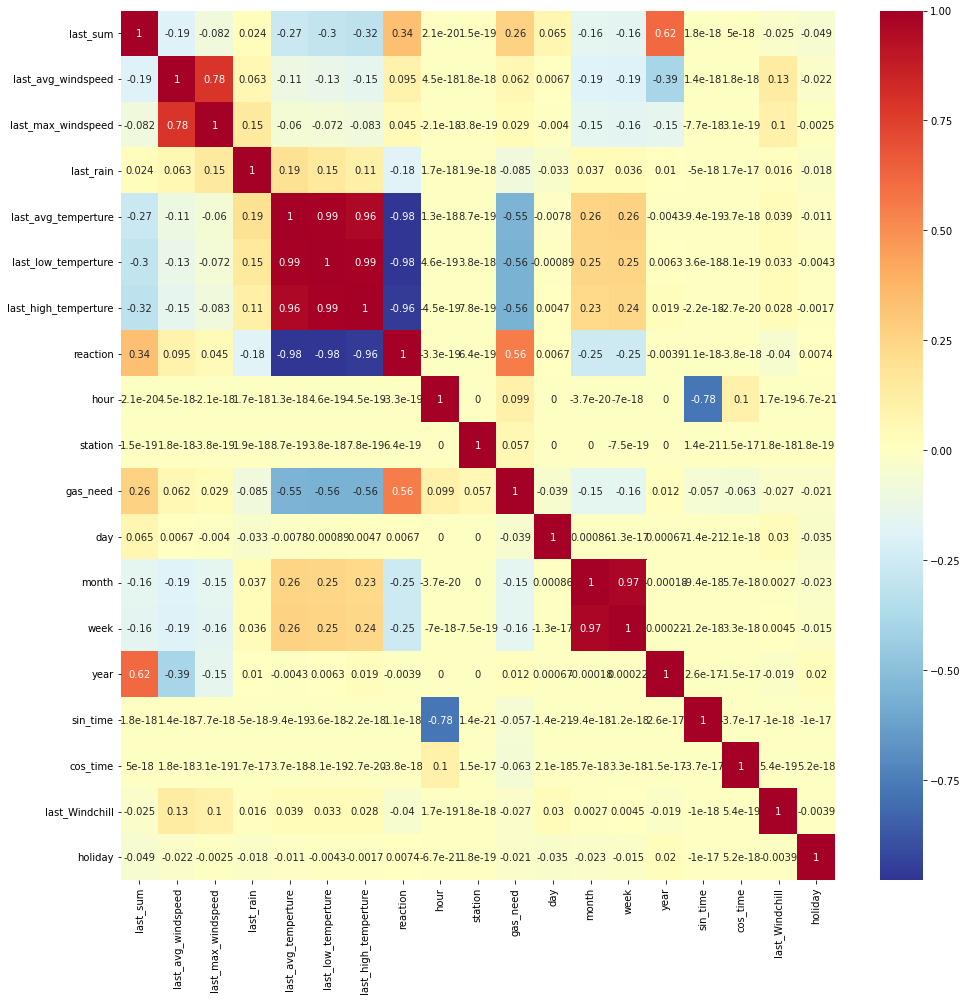

In [39]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(),annot = True, cmap = 'RdYlBu_r')
plt.show()

In [40]:
train_years = [2013,2014,2015,2016,2017]
val_years = [2018]
train = df[df['year'].isin(train_years)]
val = df[df['year'].isin(val_years)]

In [41]:
train = train
val = val

In [42]:
test = test

In [43]:
train_x = train[["last_sum","last_avg_windspeed","last_max_windspeed","last_rain","last_avg_temperture","last_low_temperture","last_high_temperture","hour","station","day","year","month","week","sin_time","cos_time","last_Windchill","holiday","reaction"]]
train_y = train["gas_need"]
val_x = val[["last_sum","last_avg_windspeed","last_max_windspeed","last_rain","last_avg_temperture","last_low_temperture","last_high_temperture","hour","station","day","year","month","week","sin_time","cos_time","last_Windchill","holiday","reaction"]]
val_y = val["gas_need"]

In [44]:
df_x = df[["last_sum","last_avg_windspeed","last_max_windspeed","last_rain","last_avg_temperture","last_low_temperture","last_high_temperture","hour","station","day","year","month","week","sin_time","cos_time","last_Windchill","holiday","reaction"]]
df_y = df["gas_need"]

In [45]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
x_train_sets = []
x_valid_sets = []
x_test_sets = []
y_train_sets = []
y_valid_sets = []
y_test_sets = []

for i in tqdm(range(7)):
  temp_train =  train[train.station == i]
  temp_test = test[test.station == i]
  y_train, y_valid, x_train, x_valid = temporal_train_test_split(y = temp_train['gas_need'] , 
                                                                 X = temp_train.drop(['gas_need','station'],axis = 1),
                                                                 test_size = 168) # 마지막 일주일
  x_train_sets.append(x_train)
  y_train_sets.append(y_train)
  x_valid_sets.append(x_valid)
  y_valid_sets.append(y_valid)                                                               
  x_test_sets.append(temp_test.drop(['station'], axis = 1))

100%|██████████| 7/7 [00:00<00:00, 63.22it/s]


In [47]:
model1 = setup(train, target = 'gas_need', session_id=970629, log_experiment=True, experiment_name='AUTO')

,Description,Value
0,session_id,970629
1,Target,gas_need
2,Original Data,"(306768, 19)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(214737, 45)"


AttributeError: ignored

In [103]:
import warnings
warnings.filterwarnings('ignore')
from lightgbm import LGBMRegressor
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error, r2_score
def SMAPE(true, pred):
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred))) * 100
#https://pseudo-lab.github.io/Tutorial-Book/chapters/time-series/Ch1-Time-Series.html#smape-symmetric-mean-absolute-percentage-error
#과대추정이 과소추정보다 패널티가 적은 LOSS
def BayesianOpt():
  optimized_params = []
  pbounds = {'max_depth': (3, 12),
            'num_leaves' : (10,70),
            'learning_rate': (0.001, 0.2),
            'n_estimators':[50, 500],
            'min_child_weight': (1, 10),
            'subsample': (0.7, 1.0),
          'colsample_bytree' :(0.65, 1.0),
            }

  for i in tqdm(range(7)):
    print('\n')
    def lgbm_cv(max_depth,num_leaves,learning_rate, n_estimators ,min_child_weight, subsample
           ,colsample_bytree, silent=True,nthread=-1):

      # 모델 정의
      model = LGBMRegressor(max_depth=int(max_depth),
                                learning_rate=learning_rate,
                                n_estimators=int(n_estimators),
                                num_leaves= int(num_leaves),
                                min_child_weight=min_child_weight,
                                subsample=subsample,
                                colsample_bytree=colsample_bytree, 
                                nthread = nthread,
                                objective = 'RMSE'
                                )
      # 모델 훈련
      model.fit(X_train, y_train)

      # 예측값 출력
      y_pred= model.predict(X_test)

      # 각종 metric 계산
      rmse = np.sqrt(mean_squared_error(y_test, y_pred))
      r2 = r2_score(y_test, y_pred)
      smape = SMAPE(y_test, y_pred)
      # 오차 최적화로 사용할 metric 반환
      return -smape
    X_train = x_train_sets[i]
    y_train = y_train_sets[i]
    X_test = x_valid_sets[i]
    y_test = y_valid_sets[i]
    bo=BayesianOptimization(f=lgbm_cv, pbounds=pbounds, verbose=2, random_state=42 )    
    bo.maximize(init_points=5, n_iter=25)
    optimized_params.append(bo.max)
  return optimized_params

In [104]:
optimized_params = BayesianOpt()

  0%|          | 0/7 [00:00<?, ?it/s]



|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        | -3.952    |  0.7811   |  0.1902   |  9.588    |  6.388    |  120.2    |  15.14    |  0.7174   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  2        | -3.993    |  0.9532   |  0.1206   |  9.373    |  1.185    |  486.5    |  59.11    |  0.7637   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  3        | -3.465    |  0.7136   |  0.0375   |  5.738    |  5.723    |  244.4    |  23.93    |  0.8836   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  4        | -3.649    |  0.6988   |  0.05914  |  6.297    |  5.105    |  403.3    |  1

 14%|█▍        | 1/7 [00:36<03:41, 36.85s/it]

|  45       | -3.581    |  0.9741   |  0.0509   |  3.265    |  6.711    |  344.0    |  28.87    |  0.9719   |


|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  1        | -3.576    |  0.7811   |  0.1902   |  9.588    |  6.388    |  120.2    |  15.14    |  0.7174   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  2        | -3.33     |  0.9532   |  0.1206   |  9.373    |  1.185    |  486.5    |  59.11    |  0.7637   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  3        | -3.469    |  0.7136   |  0.0375   |  5.738    |  5.723    |  244.4    |  2

 29%|██▊       | 2/7 [01:21<03:28, 41.65s/it]

|  45       | -4.041    |  1.0      |  0.2      |  4.131    |  9.441    |  487.5    |  51.3     |  0.7      |


|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  1        | -2.199    |  0.7811   |  0.1902   |  9.588    |  6.388    |  120.2    |  15.14    |  0.7174   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  2        | -2.008    |  0.9532   |  0.1206   |  9.373    |  1.185    |  486.5    |  59.11    |  0.7637   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  3        | -1.902    |  0.7136   |  0.0375   |  5.738    |  5.723    |  244.4    |  2

 43%|████▎     | 3/7 [02:08<02:55, 43.77s/it]

|  45       | -2.5      |  1.0      |  0.2      |  12.0     |  1.0      |  419.6    |  62.56    |  0.7      |


|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  1        | -3.773    |  0.7811   |  0.1902   |  9.588    |  6.388    |  120.2    |  15.14    |  0.7174   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  2        | -3.746    |  0.9532   |  0.1206   |  9.373    |  1.185    |  486.5    |  59.11    |  0.7637   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  3        | -3.58     |  0.7136   |  0.0375   |  5.738    |  5.723    |  244.4    |  2

 57%|█████▋    | 4/7 [03:04<02:26, 48.76s/it]

|  45       | -3.428    |  1.0      |  0.2      |  12.0     |  1.0      |  281.9    |  47.77    |  1.0      |


|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  1        | -3.658    |  0.7811   |  0.1902   |  9.588    |  6.388    |  120.2    |  15.14    |  0.7174   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  2        | -3.232    |  0.9532   |  0.1206   |  9.373    |  1.185    |  486.5    |  59.11    |  0.7637   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  3        | -3.632    |  0.7136   |  0.0375   |  5.738    |  5.723    |  244.4    |  2

 71%|███████▏  | 5/7 [03:47<01:33, 46.68s/it]

|  45       | -3.535    |  0.8876   |  0.1886   |  3.041    |  1.251    |  320.1    |  46.57    |  0.7378   |


|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  1        | -3.591    |  0.7811   |  0.1902   |  9.588    |  6.388    |  120.2    |  15.14    |  0.7174   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  2        | -3.352    |  0.9532   |  0.1206   |  9.373    |  1.185    |  486.5    |  59.11    |  0.7637   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  3        | -3.138    |  0.7136   |  0.0375   |  5.738    |  5.723    |  244.4    |  2

 86%|████████▌ | 6/7 [04:29<00:44, 45.00s/it]

|  45       | -4.022    |  1.0      |  0.1302   |  4.412    |  3.079    |  275.9    |  39.48    |  0.7375   |


|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  1        | -4.049    |  0.7811   |  0.1902   |  9.588    |  6.388    |  120.2    |  15.14    |  0.7174   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  2        | -3.553    |  0.9532   |  0.1206   |  9.373    |  1.185    |  486.5    |  59.11    |  0.7637   |
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  3        | -3.161    |  0.7136   |  0.0375   |  5.738    |  5.723    |  244.4    |  2

100%|██████████| 7/7 [05:08<00:00, 44.01s/it]

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
|  45       | -30.86    |  0.65     |  0.001    |  3.0      |  1.0      |  50.0     |  29.26    |  1.0      |


In [105]:
lgbm_sets = []
scores = []
for i in tqdm(range(7)):
  X_train = x_train_sets[i]
  y_train = y_train_sets[i]
  X_valid = x_valid_sets[i]
  y_valid = y_valid_sets[i]
  model = LGBMRegressor(colsample_bytree = optimized_params[i]['params']['colsample_bytree'],learning_rate =  optimized_params[i]['params']['learning_rate'], max_depth = int(optimized_params[i]['params']['max_depth']),
                        min_child_weight = optimized_params[i]['params']['min_child_weight'], n_estimators = int(optimized_params[i]['params']['n_estimators']), num_leaves = int(optimized_params[i]['params']['num_leaves']),
                        subsample =optimized_params[i]['params']['subsample']) 
  model.fit(X_train, y_train, eval_set=[ (X_train, y_train),(X_valid, y_valid)], early_stopping_rounds=300, verbose=False)
  lgbm_sets.append(model)
  score = SMAPE(y_valid, model.predict(x_valid))#nmae 써야하는데 그냥 했습니닷
  scores.append(score)
for i in range(7):
  print("station {} || best score : {}".format(i+1, scores[i]))
  pred = lgbm_sets[i].predict(x_test_sets[i])
  submission.iloc[2160*i:2160*(i+1),1] = pred
  '''
station 1 || best score : 3.223375973769245
station 2 || best score : 3.6467243481583616
station 3 || best score : 1.965790716072524
station 4 || best score : 3.468061288268323
station 5 || best score : 3.213420783983613
station 6 || best score : 2.931334786332616
station 7 || best score : 3.1340643674703066
  '''
  '''
  3.4851799018736918
station 2 || best score : 3.037485789684993
station 3 || best score : 1.600486474145047
station 4 || best score : 3.2682483834638294
station 5 || best score : 2.93423283627643
station 6 || best score : 3.0358452864629943
station 7 || best score : 3.0855697235548365'''

100%|██████████| 7/7 [00:05<00:00,  1.35it/s]

station 1 || best score : 3.4382346732922486
station 2 || best score : 3.2894474004130223
station 3 || best score : 1.4439653641358994
station 4 || best score : 3.258872112469068
station 5 || best score : 2.8954546417943097
station 6 || best score : 2.9963616719133364
station 7 || best score : 2.883738520596151


In [107]:
submission.to_csv("/content/drive/MyDrive/XGB_PRATICE.csv", index = False)

In [59]:
model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              params={'colsample_bytree': 0.9245490121226135,
                      'learning_rate': 0.04642497349669831,
                      'max_depth': 4.071642743364293,
                      'min_child_weight': 4.956458555324535,
                      'n_estimators': 287.99171070533816,
                      'num_leaves': 36.026110923248346,
                      'subsample': 0.8463831404439417},
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
              target=-3.2778892650490583)

In [70]:
optimized_params[i]['params']

KeyError: ignored

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb

# 탐색 대상 함수 (XGBRegressor)
def XGB_cv(max_depth,learning_rate, n_estimators, gamma ,min_child_weight, subsample
           ,colsample_bytree, silent=True, nthread=-1):

      # 모델 정의
      model = xgb.XGBRegressor(max_depth=int(max_depth),
                                learning_rate=learning_rate,
                                n_estimators=int(n_estimators),
                                gamma=gamma,
                                min_child_weight=min_child_weight,
                                subsample=subsample,
                                colsample_bytree=colsample_bytree, 
                                nthread=nthread,
                                objective = 'reg:squarederror'
                                )
      # 모델 훈련
      model.fit(X_train, y_train)

      # 예측값 출력
      y_pred= model.predict(X_test)

      # 각종 metric 계산
      rmse = np.sqrt(mean_squared_error(y_test, y_pred))
      r2 = r2_score(y_test, y_pred)
      smape = SMAPE(y_test, y_pred)
      # 오차 최적화로 사용할 metric 반환
      return -smape

In [ ]:
def BayesianOpt():
  optimized_params = []
  pbounds = {'max_depth': (4, 10),
           'learning_rate': (0.01, 0.1),
           'n_estimators': (50, 500),
           'gamma': (1, 100),
           'min_child_weight': (1, 10),
           'subsample': (0.7, 1.0),
           'colsample_bytree' :(0.65, 1.0),
            }

  for i in tqdm(range(7)):
    print('\n')
    def XGB_cv(max_depth,learning_rate, n_estimators, gamma
           ,min_child_weight, subsample
           ,colsample_bytree, silent=True, nthread=-1):
      model = xgb.XGBRegressor(max_depth=int(max_depth),
                                learning_rate=learning_rate,
                                n_estimators=int(n_estimators),
                                gamma=gamma,
                                min_child_weight=min_child_weight,
                                subsample=subsample,
                                colsample_bytree=colsample_bytree, 
                                nthread=nthread,
                                objective = 'reg:squarederror'
                                ,n_jobs = -1
                                )
      model.fit(X_train, y_train)
      y_pred= model.predict(X_test)
      rmse = np.sqrt(mean_squared_error(y_test, y_pred))
      r2 = r2_score(y_test, y_pred)
      smape = SMAPE(y_test, y_pred)
      return -smape
    X_train = x_train_sets[i]
    y_train = y_train_sets[i]
    X_test = x_valid_sets[i]
    y_test = y_valid_sets[i]
    bo=BayesianOptimization(f=XGB_cv, pbounds=pbounds, verbose=2, random_state=42 )    
    bo.maximize(init_points=2, n_iter=23, acq='ei', xi=0.01)
    optimized_params.append(bo.max)
  return optimized_params

In [ ]:
optimized_params = BayesianOpt()

In [ ]:
xgb_sets = []
scores = []
for i in tqdm(range(7)):
  x_train = x_train_sets[i]
  y_train = y_train_sets[i]
  x_valid = x_valid_sets[i]
  y_valid = y_valid_sets[i]
  model = xgb.XGBRegressor(**optimized_params[i], objective = 'reg:squarederror')
  model.fit(x_train, y_train, eval_set=[(x_train, y_train), 
                                            (x_valid, y_valid)], early_stopping_rounds=300, verbose=False)
  xgb_sets.append(model)
  score = SMAPE(y_valid, model.predict(x_valid))#nmae 써야하는데 그냥 했습니닷
  scores.append(score)

In [ ]:
for i in range(7):
  temp = pd.Series(xgb_sets[i].predict(x_valid_sets[i]))
  temp.index = y_valid_sets[i].index
  plot_series(y_train_sets[i],y_valid_sets[i], temp,markers = [',',',',','])
  plt.title("station : "+str(i))

In [ ]:
xgb_sets = []
scores = []
for i in tqdm(range(7)):
  x_train = x_train_sets[i]
  y_train = y_train_sets[i]
  x_valid = x_valid_sets[i]
  y_valid = y_valid_sets[i]
  model = xgb.XGBRegressor(**optimized_params[i], objective = 'reg:squarederror')
  model.fit(x_train, y_train, eval_set=[(x_train, y_train), 
                                            (x_valid, y_valid)], early_stopping_rounds=300, verbose=False)
  xgb_sets.append(model)
  score = SMAPE(y_valid, model.predict(x_valid))#nmae 써야하는데 그냥 했습니닷
  scores.append(score)
for i in range(7):
  print("station {} || best score : {}".format(i+1, scores[i]))
  pred = xgb_sets[i].predict(x_test_sets[i])
  submission.iloc[2160*i:2160*(i+1),1] = pred
  '''
station 1 || best score : 3.223375973769245
station 2 || best score : 3.6467243481583616
station 3 || best score : 1.965790716072524
station 4 || best score : 3.468061288268323
station 5 || best score : 3.213420783983613
station 6 || best score : 2.931334786332616
station 7 || best score : 3.1340643674703066
  '''

In [ ]:
submission

In [ ]:
submission.to_csv("/content/drive/MyDrive/XGB_PRATICE.csv", index = False)

In [ ]:
def BayesianOpt():
  optimized_params = []
  pbounds = {'max_depth': (5, 15),
           'learning_rate': (0.01, 1),
           'n_estimators': (50, 500),
           'gamma': (0, 120),
           'min_child_weight': (1, 8),
           'subsample': (0.5, 1),
           'colsample_bytree' :(0.2, 1),
            }
  for i in tqdm(range(60)):
    print('\n')
    def XGB_cv(max_depth,learning_rate, n_estimators, gamma
           ,min_child_weight, subsample
           ,colsample_bytree, silent=True, nthread=-1):
      model = xgb.XGBRegressor(max_depth=int(max_depth),
                                learning_rate=learning_rate,
                                n_estimators=int(n_estimators),
                                gamma=gamma,
                                min_child_weight=min_child_weight,
                                subsample=subsample,
                                colsample_bytree=colsample_bytree, 
                                nthread=nthread,
                                objective = 'reg:squarederror'
                                )
      model.fit(X_train, y_train)
      y_pred= model.predict(X_test)
      rmse = np.sqrt(mean_squared_error(y_test, y_pred))
      r2 = r2_score(y_test, y_pred)
      smape = SMAPE(y_test, y_pred)
      return -smape
    X_train = x_train_sets[i]
    y_train = y_train_sets[i]
    X_test = x_valid_sets[i]
    y_test = y_valid_sets[i]
    bo=BayesianOptimization(f=XGB_cv, pbounds=pbounds, verbose=2, random_state=1 )    
    bo.maximize(init_points=2, n_iter=20, acq='ei', xi=0.01)
    optimized_params.append(bo.max)
  return optimized_params